# Домашнее задание "Методология ведения DS-проектов"

Возьмите задачу с винами (www.kaggle.com...ne-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.

# 1. Цель

Предсказать качество вина

# 1.1. Описание

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

# 2. Понимание данных

2.1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install xgboost

You should consider upgrading via the '/Users/glebmutovin/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

You should consider upgrading via the '/Users/glebmutovin/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

You should consider upgrading via the '/Users/glebmutovin/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from xgboost import XGBClassifier
from sklearn import metrics, tree
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier

# 2.2. Загрузка данных

In [3]:
df = pd.read_csv('winequalityN.csv')

In [4]:
df.shape

(6497, 13)

# 2.3. Статистика и визуализация

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Описание переменных:

Признаки для обучения:
* 1 - fixed acidity (фиксированная кислотность)
* 2 - volatile acidity (летучая кислотность)
* 3 - citric acid (лимонная кислота)
* 4 - residual sugar (остаточный сахар)
* 5 - chlorides (хлориды)
* 6 - free sulfur dioxide (кол-во свободного диоксида серы)
* 7 - total sulfur dioxide (общее кол-во диоксида серы)
* 8 - density (плотность)
* 9 - pH (концентрация ионов водорода в граммах на литр)
* 10 - sulphates (сульфаты)
* 11 - alcohol (процент алкоголя)

Целевая переменная:
* 12 - quality (качество вина - рейтинг от 0 до 10)

# 2.3.1. Ключевая информация по переменным

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().sum()

# Есть небольшое количество пропусков в 7 атрибутах 

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df.quality.value_counts()

# Видим, что классы несбалансированны 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# 2.3.2. Тепловая карта корреляции

In [12]:
corr = df.corr()

In [13]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


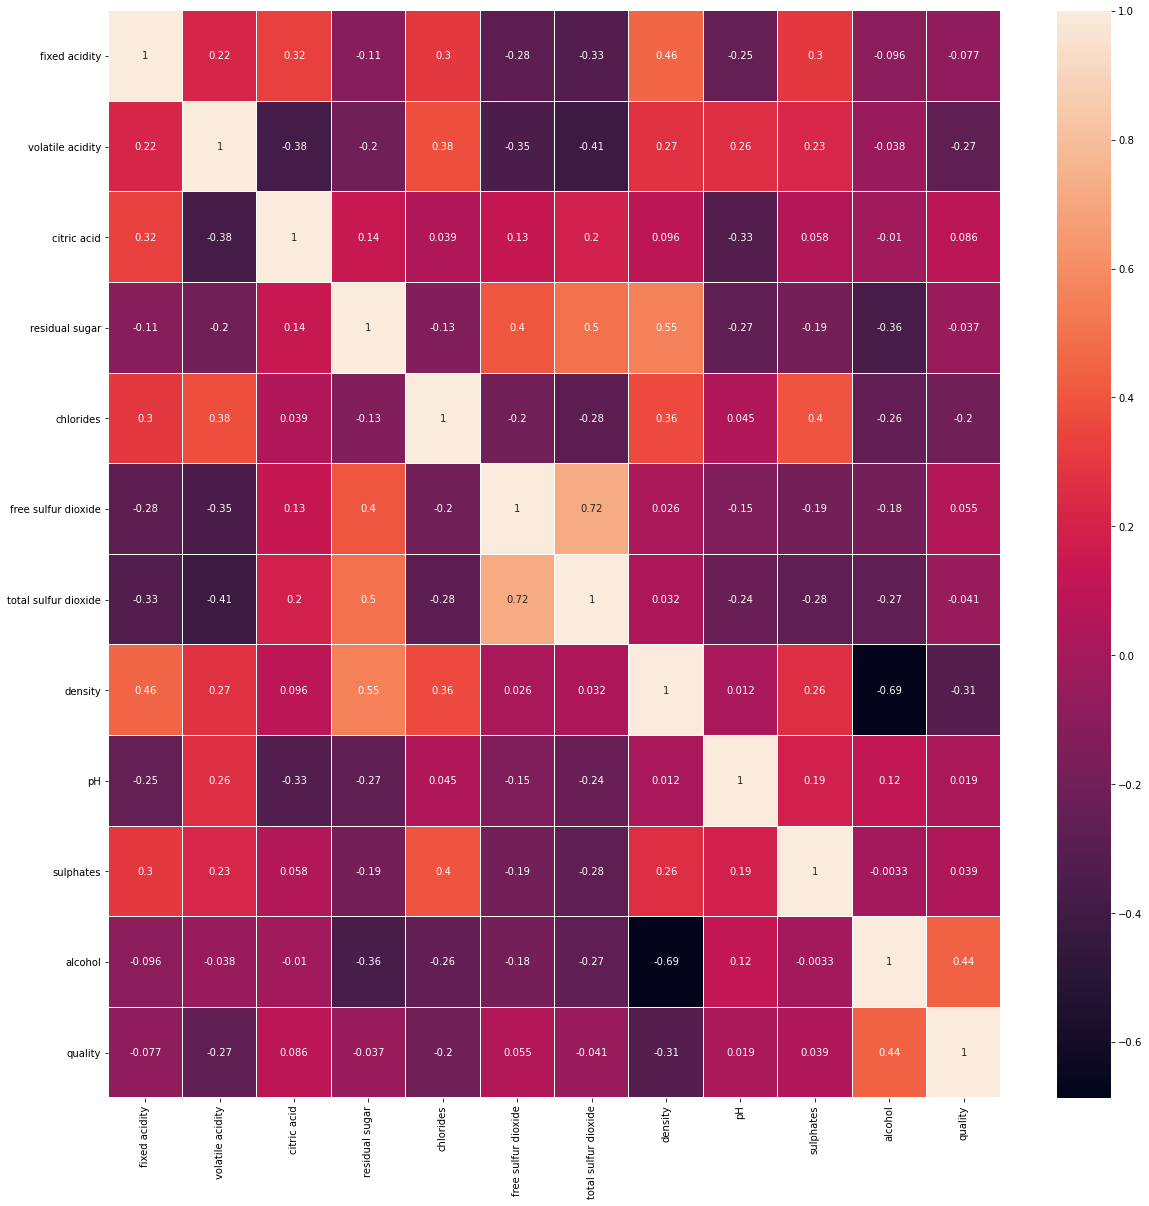

In [14]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.100)

Больше всего на качество вина влияют признаки alcohol, density, volatile acidity, chlorids. 

pH и sulphates особо не влияют на значение целевой переменной

In [5]:
df['alcohol_round'] = df['alcohol'].apply(lambda x: round(x))

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol_round', ylabel='quality'>

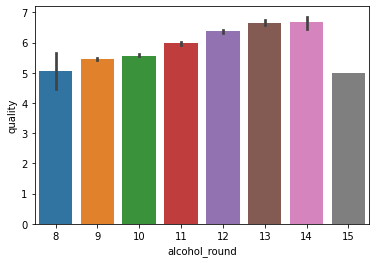

In [6]:
sns.barplot(df['alcohol_round'], df['quality'])


# 3. Подготовка данных

3.1. Преобразование категориальных признаков

In [7]:
# Только один категориальный признак - тип вина. Можно преобразовать через one_hot_encoding

In [8]:
wine_type = pd.get_dummies(df['type'], prefix='Type')
wine_type.head()

,Type_red,Type_white
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
df = pd.concat([df, wine_type], axis=1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_round,Type_red,Type_white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,9,0,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,10,0,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10,0,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,10,0,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,10,0,1


In [10]:
df.drop(['type'], axis=1, inplace=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_round,Type_red,Type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,9,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,10,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,10,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,10,0,1


In [12]:
def change_class_num(x):
    if x==3:
        return 0
    elif x==4:
        return 1
    elif x==5:
        return 2
    elif x==6:
        return 3
    elif x==7:
        return 4
    elif x==8:
        return 5
    else:
        return 6

In [13]:
df['quality_label'] = df.quality.apply(change_class_num)

3.2. Заполнение пропусков

In [14]:
df.isna().sum()

# Пропусков очень мало, можно просто исключить строчки с пропусками

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
alcohol_round            0
Type_red                 0
Type_white               0
quality_label            0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  alcohol_round         6463 non-null   int64  
 13  Type_red              6463 non-null   uint8  
 14  Type_white            6463 non-null   uint8  
 15  quality_label        

3.3. Создание датасетов

In [17]:
df.drop('alcohol_round', axis=1, inplace=True)

In [18]:
df.drop('quality', axis=1, inplace=True)

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_red,Type_white,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1,3


In [20]:
target = df['quality_label']
df.drop('quality_label', axis=1, inplace=True)

3.4. Разделение выборки на тренировочную и тестовую

In [21]:
X_train , X_test, y_train, y_test = train_test_split(df , target, test_size=0.3, random_state=42)

3.5. Важность признаков

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model_tree = ExtraTreesClassifier()
model_tree.fit(X_train, y_train)

ExtraTreesClassifier()

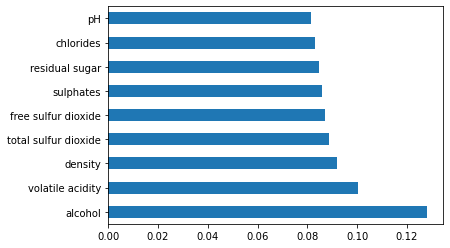

In [23]:
feat_importances = pd.Series(model_tree.feature_importances_, index =X_train.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

# 4. Моделирование

4.1. Выбор модели

SVM

In [24]:
clf_svm = SVC(kernel="rbf",C=1)

XGBoost

In [25]:
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

Логистическая регрессия

In [26]:
log_red_model = LogisticRegression(solver='liblinear',multi_class = 'auto')

In [28]:
clf_lgreg = make_pipeline(StandardScaler(), log_red_model)

4.2. Обучение модели

SVM

In [27]:
clf_svm.fit(X_train,y_train)

SVC(C=1)

XGBoost

In [29]:
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

Логистическая регрессия

In [30]:
clf_lgreg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

# 5. Оценка модели

SVM

In [31]:
scores_svm = cross_val_score(clf_svm, X_train,y_train,cv=8,scoring="accuracy")
scores_svm.mean()

/Users/glebmutovin/Downloads/ENTER/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  warnings.warn(


0.4396549297976797

In [32]:
scores_svm

array([0.43639576, 0.44169611, 0.44169611, 0.43992933, 0.43716814,
       0.43539823, 0.44247788, 0.44247788])

In [35]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.43063434760185665

XGBoost

In [37]:
y_pred_xgb = xgboost_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.6415678184631253

In [49]:
scores_xgb = cross_val_score(xgboost_model, df, target,cv=5,scoring="roc_auc_ovr_weighted")
scores_xgb.mean()

0.6798239102344507

In [42]:
roc_auc_score(y_test, xgboost_model.predict_proba(X_test), multi_class='ovr')

0.8521724877748262

In [43]:
logloss = log_loss(y_test, xgboost_model.predict_proba(X_test))
logloss

0.9481851859815522

Логистическая регрессия

In [50]:
y_pred_logress = clf_lgreg.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred_logress)
accuracy

0.5368746776689015

In [53]:
scores_lgreg = cross_val_score(clf_lgreg, df, target,cv=5,scoring="roc_auc_ovr_weighted")
scores_lgreg.mean()

0.7013610272242916

In [52]:
roc_auc_score(y_test, clf_lgreg.predict_proba(X_test), multi_class='ovr')

0.7880262428108008

# Итог

Среди выбранных моделей ни одна не показала высокие результаты качества классификации класса вина. 
При этом модель XGBoost выделяется по значению roc-auc, поэтому наиболее приемлимой моделью для многоклассовой классификации с учетом несбалансированности классов в рамках нашей задачи является именно эта модель.

Также возможно попробовать обучить нейронную сеть с многоклассовой классификацией и сравнить полученные результаты с результатами модели XGBoost (на Kaggle в задаче по многоклассовой классификации классов вина нейронная сеть показала результаты хуже, чем ряд моделей классического ML).